<a href="https://colab.research.google.com/github/shivani-nandani/rumor-spread/blob/main/Trust_in_SIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

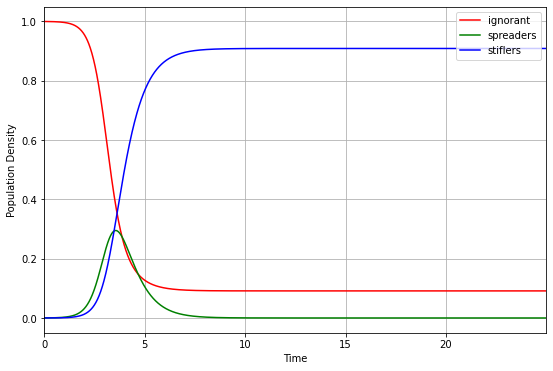

In [ ]:
N = 5000   # population

# ignorant to spreader
alpha = 0.4  # untrusted neighbours (0<alpha<1)
lambda_ = 0.5  # infection rate when a uninfected node contacts an infected trusted neighbour
beta = 0.6  # factor to infection rate when a uninfected node contacts an infected untrused neighbour (0<beta<1)

# spreader to stifler
sigma = 0.1  # rate at which a spreader becomes a stifler when the spreader contacts a spreader or a stifler
delta = 1  # stifling rate (forgetting or disinclination), no contact needed

# homogenous network
k = 6   # degree

I0 = 4999/N
S0 = 1/N
R0 = 0/N

start = 0
end = 25
dt = 0.01
t = np.arange(start,end,dt)
n = int((end-start)/dt)

I = np.zeros(n) # ignorant
S = np.zeros(n) # spreader
R = np.zeros(n) # stifler

I[0] = I0
S[0] = S0
R[0] = R0

for i in range(1,n):
  I[i] = I[i-1] + (-(beta + (1-alpha))*S[i-1]*I[i-1]*k*lambda_)*dt
  S[i] = S[i-1] + ((beta + (1-alpha))*S[i-1]*I[i-1]*k*lambda_ - (sigma*k*S[i-1]*(S[i-1]+R[i-1]) + delta*S[i-1]))*dt
  R[i] = R[i-1] + (sigma*k*S[i-1]*(S[i-1]+R[i-1]) + delta*S[i-1])*dt


plt.figure(figsize = [9,6])
plt.plot(t, I, c = 'r', linestyle = '-', label = 'ignorant')
plt.plot(t, S, c = 'g', linestyle = '-', label = 'spreaders')
plt.plot(t, R, c = 'b', linestyle = '-', label = 'stiflers')
plt.ylabel('Population Density')
plt.xlabel('Time')
plt.legend(loc = 'upper right')
plt.xlim(0, max(t))
plt.grid()
plt.show()

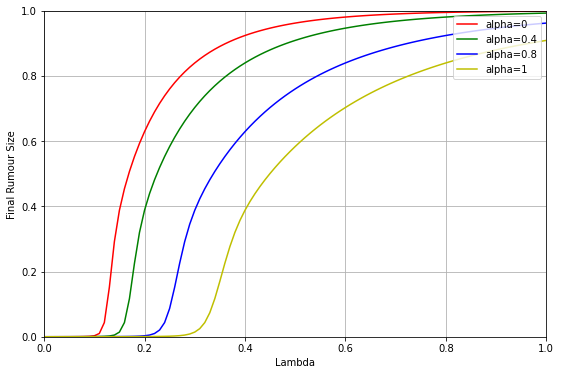

In [ ]:
# R vs lambda, changing alpha

N = 5000   # population

# ignorant to spreader
alpha_arr = [0,0.4,0.8,1]  # untrusted neighbours (0<alpha<1)
lambda_arr = np.arange(0,1+0.01,0.01)  # infection rate when a uninfected node contacts an infected trusted neighbour
beta = 0.6  # factor to infection rate when a uninfected node contacts an infected untrused neighbour (0<beta<1)

# spreader to stifler
sigma = 0.1  # rate at which a spreader becomes a stifler when the spreader contacts a spreader or a stifler
delta = 1  # stifling rate (forgetting or disinclination), no contact needed

# homogenous network
k = 6   # degree

I0 = 4999/N
S0 = 1/N
R0 = 0/N

start = 0
end = 25
dt = 0.01
t = np.arange(start,end,dt)
n = int((end-start)/dt)

R_table = []
for alpha in alpha_arr:
  final_R = []
  for lambda_ in lambda_arr:
    I = np.zeros(n) # ignorant
    S = np.zeros(n) # spreader
    R = np.zeros(n) # stifler

    I[0] = I0
    S[0] = S0
    R[0] = R0

    for i in range(1,n):
      I[i] = I[i-1] + (-(beta + (1-alpha))*S[i-1]*I[i-1]*k*lambda_)*dt
      S[i] = S[i-1] + ((beta + (1-alpha))*S[i-1]*I[i-1]*k*lambda_ - (sigma*k*S[i-1]*(S[i-1]+R[i-1]) + delta*S[i-1]))*dt
      R[i] = R[i-1] + (sigma*k*S[i-1]*(S[i-1]+R[i-1]) + delta*S[i-1])*dt
    final_R.append(R[-1])
  R_table.append(final_R)


plt.figure(figsize = [9,6])
plt.plot(lambda_arr, R_table[0], c = 'r', linestyle = '-', label = 'alpha=0')
plt.plot(lambda_arr, R_table[1], c = 'g', linestyle = '-', label = 'alpha=0.4')
plt.plot(lambda_arr, R_table[2], c = 'b', linestyle = '-', label = 'alpha=0.8')
plt.plot(lambda_arr, R_table[3], c = 'y', linestyle = '-', label = 'alpha=1')
plt.ylabel('Final Rumour Size')
plt.xlabel('Lambda')
plt.legend(loc = 'upper right')
plt.xlim(0, max(lambda_arr))
plt.ylim(0,1)
plt.grid()
plt.show()

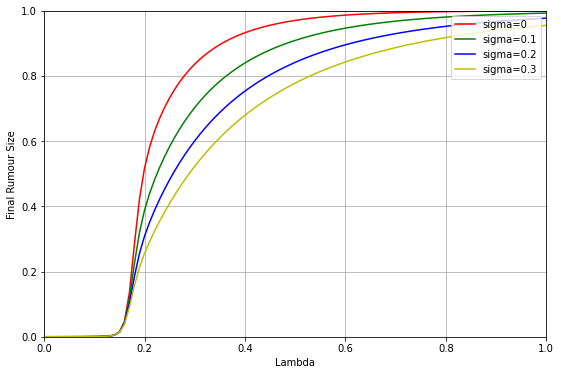

In [ ]:
# R vs lambda, changing sigma

N = 5000   # population

# ignorant to spreader
alpha = 0.4  # untrusted neighbours (0<alpha<1)
lambda_arr = np.arange(0,1+0.01,0.01)  # infection rate when a uninfected node contacts an infected trusted neighbour
beta = 0.6  # factor to infection rate when a uninfected node contacts an infected untrused neighbour (0<beta<1)

# spreader to stifler
sigma_arr = [0,0.1,0.2,0.3]  # rate at which a spreader becomes a stifler when the spreader contacts a spreader or a stifler
delta = 1  # stifling rate (forgetting or disinclination), no contact needed

# homogenous network
k = 6   # degree

I0 = 4999/N
S0 = 1/N
R0 = 0/N

start = 0
end = 25
dt = 0.01
t = np.arange(start,end,dt)
n = int((end-start)/dt)

R_table = []
for sigma in sigma_arr:
  final_R = []
  for lambda_ in lambda_arr:
    I = np.zeros(n) # ignorant
    S = np.zeros(n) # spreader
    R = np.zeros(n) # stifler

    I[0] = I0
    S[0] = S0
    R[0] = R0

    for i in range(1,n):
      I[i] = I[i-1] + (-(beta + (1-alpha))*S[i-1]*I[i-1]*k*lambda_)*dt
      S[i] = S[i-1] + ((beta + (1-alpha))*S[i-1]*I[i-1]*k*lambda_ - (sigma*k*S[i-1]*(S[i-1]+R[i-1]) + delta*S[i-1]))*dt
      R[i] = R[i-1] + (sigma*k*S[i-1]*(S[i-1]+R[i-1]) + delta*S[i-1])*dt
    final_R.append(R[-1])
  R_table.append(final_R)


plt.figure(figsize = [9,6])
plt.plot(lambda_arr, R_table[0], c = 'r', linestyle = '-', label = 'sigma=0')
plt.plot(lambda_arr, R_table[1], c = 'g', linestyle = '-', label = 'sigma=0.1')
plt.plot(lambda_arr, R_table[2], c = 'b', linestyle = '-', label = 'sigma=0.2')
plt.plot(lambda_arr, R_table[3], c = 'y', linestyle = '-', label = 'sigma=0.3')
plt.ylabel('Final Rumour Size')
plt.xlabel('Lambda')
plt.legend(loc = 'upper right')
plt.xlim(0, max(lambda_arr))
plt.ylim(0,1)
plt.grid()
plt.show()

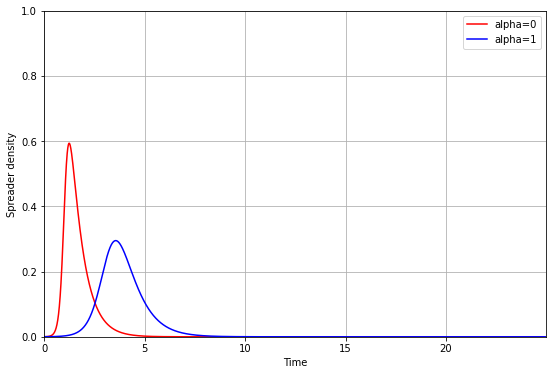

In [ ]:
# Spreader density vs time, changing alpha

N = 5000   # population

# ignorant to spreader
alpha_arr = [0,1]  # untrusted neighbours (0<alpha<1)
lambda_ = 1  # infection rate when a uninfected node contacts an infected trusted neighbour
beta = 0.6  # factor to infection rate when a uninfected node contacts an infected untrused neighbour (0<beta<1)

# spreader to stifler
sigma = 0.1  # rate at which a spreader becomes a stifler when the spreader contacts a spreader or a stifler
delta = 1  # stifling rate (forgetting or disinclination), no contact needed

# homogenous network
k = 6   # degree

I0 = 4999/N
S0 = 1/N
R0 = 0/N

start = 0
end = 25
dt = 0.01
t = np.arange(start,end,dt)
n = int((end-start)/dt)

S_table = []
for alpha in alpha_arr:
  I = np.zeros(n) # ignorant
  S = np.zeros(n) # spreader
  R = np.zeros(n) # stifler

  I[0] = I0
  S[0] = S0
  R[0] = R0

  for i in range(1,n):
    I[i] = I[i-1] + (-(beta + (1-alpha))*S[i-1]*I[i-1]*k*lambda_)*dt
    S[i] = S[i-1] + ((beta + (1-alpha))*S[i-1]*I[i-1]*k*lambda_ - (sigma*k*S[i-1]*(S[i-1]+R[i-1]) + delta*S[i-1]))*dt
    R[i] = R[i-1] + (sigma*k*S[i-1]*(S[i-1]+R[i-1]) + delta*S[i-1])*dt

  S_table.append(S)


plt.figure(figsize = [9,6])
plt.plot(t, S_table[0], c = 'r', linestyle = '-', label = 'alpha=0')
plt.plot(t, S_table[1], c = 'b', linestyle = '-', label = 'alpha=1')
plt.ylabel('Spreader density')
plt.xlabel('Time')
plt.legend(loc = 'upper right')
plt.xlim(0, max(t))
plt.ylim(0,1)
plt.grid()
plt.show()

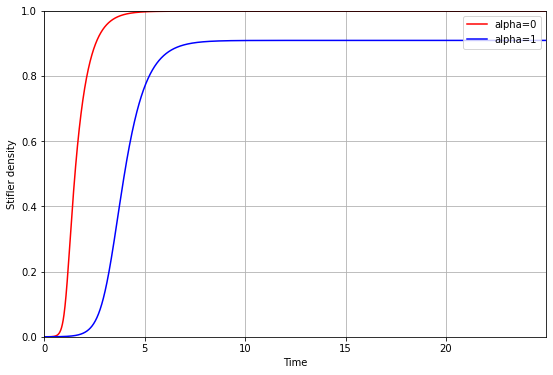

In [ ]:
# Stifler density vs time, changing alpha

N = 5000   # population

# ignorant to spreader
alpha_arr = [0,1]  # untrusted neighbours (0<alpha<1)
lambda_ = 1  # infection rate when a uninfected node contacts an infected trusted neighbour
beta = 0.6  # factor to infection rate when a uninfected node contacts an infected untrused neighbour (0<beta<1)

# spreader to stifler
sigma = 0.1  # rate at which a spreader becomes a stifler when the spreader contacts a spreader or a stifler
delta = 1  # stifling rate (forgetting or disinclination), no contact needed

# homogenous network
k = 6   # degree

I0 = 4999/N
S0 = 1/N
R0 = 0/N

start = 0
end = 25
dt = 0.01
t = np.arange(start,end,dt)
n = int((end-start)/dt)

R_table = []
for alpha in alpha_arr:
  I = np.zeros(n) # ignorant
  S = np.zeros(n) # spreader
  R = np.zeros(n) # stifler

  I[0] = I0
  S[0] = S0
  R[0] = R0

  for i in range(1,n):
    I[i] = I[i-1] + (-(beta + (1-alpha))*S[i-1]*I[i-1]*k*lambda_)*dt
    S[i] = S[i-1] + ((beta + (1-alpha))*S[i-1]*I[i-1]*k*lambda_ - (sigma*k*S[i-1]*(S[i-1]+R[i-1]) + delta*S[i-1]))*dt
    R[i] = R[i-1] + (sigma*k*S[i-1]*(S[i-1]+R[i-1]) + delta*S[i-1])*dt

  R_table.append(R)


plt.figure(figsize = [9,6])
plt.plot(t, R_table[0], c = 'r', linestyle = '-', label = 'alpha=0')
plt.plot(t, R_table[1], c = 'b', linestyle = '-', label = 'alpha=1')
plt.ylabel('Stifler density')
plt.xlabel('Time')
plt.legend(loc = 'upper right')
plt.xlim(0, max(t))
plt.ylim(0,1)
plt.grid()
plt.show()